<a href="https://colab.research.google.com/github/dmarinere/ds/blob/master/DSN_week_4_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pwd

"C:\\Users\\Tayo Swavey\\Desktop\\Iyanu's File"

In [0]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [0]:
data= pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
data.info()  #This proves there is no missing data in our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 544.0 bytes


### Question 1

In the assignment we were told to find the best Linear regression equation that would predict the Salary based on the experience of the individual.
This would be gotten from the regression coefficient and the intercept.

In [0]:
#This would convert the panda dataframe to numpy and also differentiate the data clearly , 
#X here is the Independent dataframe which is the Year of Experience and y is our dependent data in this data.
X = data.iloc[:, :-1].values #All rows, all columns excluding the last column indexed -1
y = data.iloc[:, 1].values #All rows, column 1

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Next we would find the regression score


In [0]:
print("The regression score is:", regressor.score(X,y))

The regression score is: 0.9569566641435084


In [0]:
print('The intercept for this equation is :', regressor.intercept_)

The intercept for this equation is : 25792.200198668717


In [0]:
print("The Slope of the regression is: ", regressor.coef_)

The Slope of the regression is:  [9449.96232146]


### The equation for the linear regression here is Pred

The linear equation for the predicted data frame is 
the co-efficient and the intercept which are
#### Pred = 9449.96X + 25792.2 

## Question 2

#### What new value of y will the linear regression equation suggest in line with 20% split of the previous Salary?

In [0]:

#train_test_split
from sklearn.model_selection import train_test_split
#we splitted our data by 20 percent here.
x_train, x_test,y_train, y_test= train_test_split(X, y, test_size=0.2)b

In [0]:
from sklearn.linear_model import LinearRegression
regressor_2 = LinearRegression()
regressor_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regressor_2.score(x_train, y_train)

0.967952568814689

In [0]:

regressor_2.coef_

array([9455.89017044])

In [0]:
y_pred = regressor_2.predict(x_test)

In [0]:
y_pred #This are the new salary that the linear regression suggested 

array([ 81769.77037357, 115810.97498717,  67585.93511791, 102572.72874855,
        55293.27789633,  37327.08657249])

In [0]:
y_test

array([ 93940., 112635.,  61111., 113812.,  54445.,  46205.])

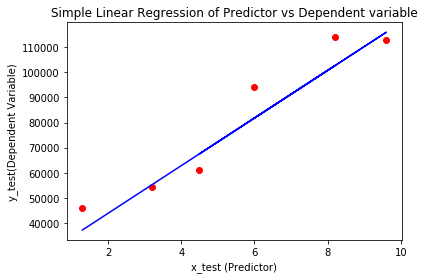

In [0]:
# Visualising the results
plt.scatter(x_test, y_test, color = 'red') #Scatter plot of the X an y dataset

plt.plot(x_test, regressor_2.predict(x_test), color = 'blue')#Line plot of X against predicted Y 
#(remember that output of regressor_2.predict is y_pred)

plt.title('Simple Linear Regression of Predictor vs Dependent variable')
plt.xlabel('x_test (Predictor)')
plt.ylabel('y_test(Dependent Variable)')
plt.show()


Question 3

In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7131.100384466475
Mean Squared Error: 67664038.58995993
Root Mean Squared Error: 8225.81537538741


In [0]:
#Importing Polynomial Feature class from SKLearn

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6) #Degree depicts the Curves
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train) #Transform X as polynomial feature

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')

In [0]:
regressor_3 = LinearRegression()
regressor_3.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regressor_3.score(X_poly, y_train)

0.9719531628109493

In [0]:
Poly_pred = regressor_3.predict(poly_reg.fit_transform(x_test))

In [0]:
y_test

array([ 93940., 112635.,  61111., 113812.,  54445.,  46205.])

In [0]:
regressor_3.predict(poly_reg.fit_transform(x_test))

array([ 81606.08119739, 113100.97174174,  65719.92435293, 106220.09335503,
        55358.42889653,  38298.14076397])

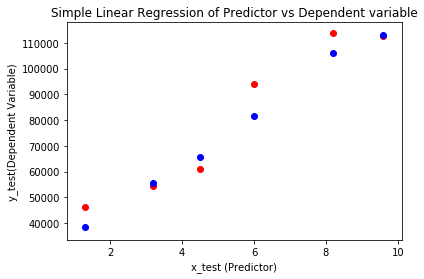

In [0]:
 # Visualising the results
plt.scatter(x_test, y_test, color = 'red') #Scatter plot of the X an y dataset

plt.scatter(x_test,  regressor_3.predict(poly_reg.fit_transform(x_test)), color = 'blue')#Line plot of X against predicted Y 
#(remember that output of regressor_2.predict is y_pred)

plt.title('Simple Linear Regression of Predictor vs Dependent variable')
plt.xlabel('x_test (Predictor)')
plt.ylabel('y_test(Dependent Variable)')
plt.show()
